In [1]:
___Author___='LumberJack Jyss'

https://www.quantinsti.com/blog/random-forest-algorithm-in-python

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set(palette='bright',style='whitegrid')
import numpy as np
import pandas as pd
import quandl
import pandas_datareader as web
from statsmodels.tsa.stattools import coint
import statsmodels
from statsmodels.tsa.stattools import adfuller
import itertools
import scipy
from scipy import stats
import time
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
start = pd.to_datetime('2010-01-19')
end = pd.to_datetime('2019-03-19')

In [3]:
data = web.DataReader('BAC','yahoo',start,end)

In [4]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-13,29.510000,28.980000,29.049999,29.290001,54683300.0,29.290001
2019-03-14,29.639999,29.240000,29.309999,29.459999,45219100.0,29.459999
2019-03-15,29.610001,29.260000,29.440001,29.299999,82346200.0,29.299999
2019-03-18,29.959999,29.330000,29.379999,29.820000,58568600.0,29.820000
2019-03-19,30.139999,29.540001,30.010000,29.650000,55455100.0,29.650000


Creating input and output dataset

In this step, I will create the input and output variable.

Input variable: I have used ‘(Open – Close)/Open’, ‘(High – Low)/Low’, standard deviation of last 5 days returns (std_5), and average of last 5 days returns (ret_5)
Output variable: If tomorrow’s close price is greater than today’s close price then the output variable is set to 1 and otherwise set to -1. 1 indicates to buy the stock and -1 indicates to sell the stock.
The choice of these features as input and output is completely random.

In [5]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)
# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

Train Test Split

We now split the dataset into 75% Training dataset and 25% for Testing dataset.

In [6]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

1726

In [7]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1726, 4) (576, 4)
(1726,) (576,)


Training the machine learning model

All set with the data! Let’s train a decision tree classifier model. The RandomForestClassifier function from tree is stored in variable ‘clf’ and then a fit method is called on it with ‘X_train’ and ‘y_train’ dataset as the parameters so that the classifier model can learn the relationship between input and output.



In [8]:
clf = RandomForestClassifier(random_state=5)

In [9]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

/Users/YTsBaCh/Applications/anaconda3/envs/env_zipline/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.48      0.55      0.51       288
           1       0.47      0.40      0.43       288

   micro avg       0.48      0.48      0.48       576
   macro avg       0.48      0.48      0.47       576
weighted avg       0.48      0.48      0.47       576



In [56]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

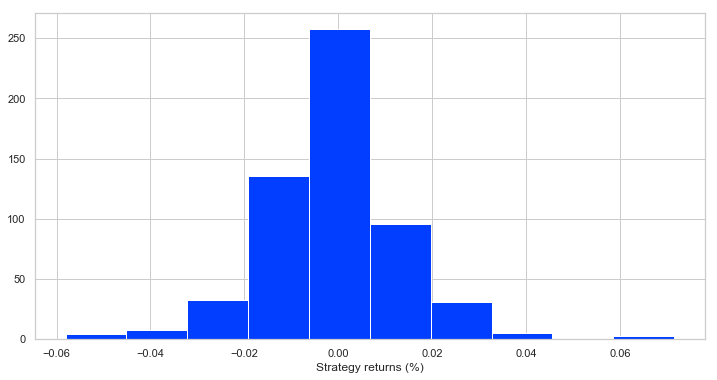

In [57]:
data.strategy_returns[split:].hist(figsize=(12,6))
plt.xlabel('Strategy returns (%)')
plt.show()

### Strategy Returns

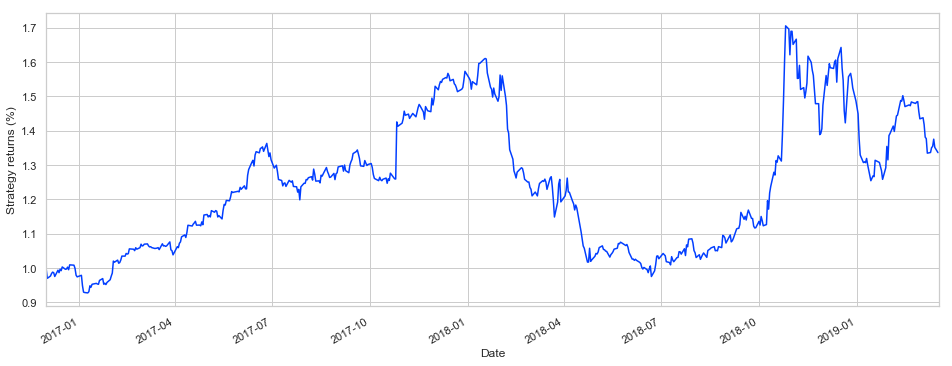

In [47]:
(data.strategy_returns[split:]+1).cumprod().plot(figsize=(16,6))
plt.ylabel('Strategy returns (%)')
plt.show()

The output displays the strategy returns and daily returns according to the code for the Random Forest Classifier.

Advantages
Avoids Overfitting
Can be used for both Classification and Regression
Can handle missing values
Disadvantages
Large number of trees can take up space and reduce time.
In this blog, we learnt the functioning of the Random Forest Algorithm with the help of an example, along with the Python code to implement this strategy.